In [2]:
from functions import *

In [38]:
n = 8
num_random_models = 10

gamma_lims = (0,1) 
gamma_steps = 50
T_lims = (1e-2,1e2)
T_steps = 50

gamma_range = np.linspace(gamma_lims[0], gamma_lims[1], gamma_steps)
T_range = np.geomspace(T_lims[0], T_lims[1], T_steps)

In [39]:
IPR = np.zeros((gamma_steps, num_random_models))
for gamma_id, gamma in tqdm(enumerate(gamma_range)):
    np.random.seed(0) # set the seed for reproducibility
    for i in range(num_random_models):
        m = RandomIsingModel(n, local_fields=True)
        H_ising = np.diag(m.E_rescaled)
        H_mixer = H_mixer_list[m.n-1]
        H = (1-gamma)*H_ising + gamma*H_mixer
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        IPR[gamma_id, i] = np.sum(np.abs(eigenvectors)**4, axis=(0,1)) / np.sum(np.abs(eigenvectors)**2, axis=(0,1))

50it [00:04, 10.30it/s]


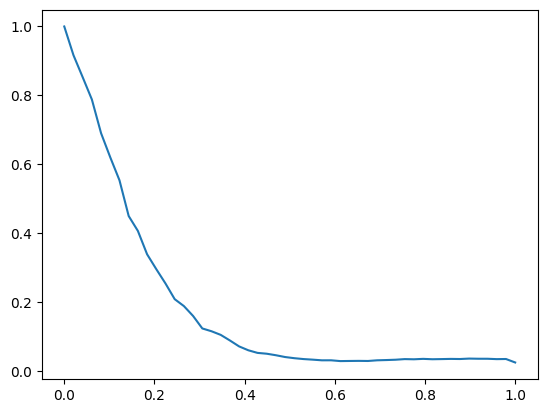

In [41]:
IPR_avg = np.mean(IPR, axis=1)
IPR_std = np.std(IPR, axis=1)
plt.plot(gamma_range, IPR_avg)